### This notebook discusses about the Compression Algos and Reading Files

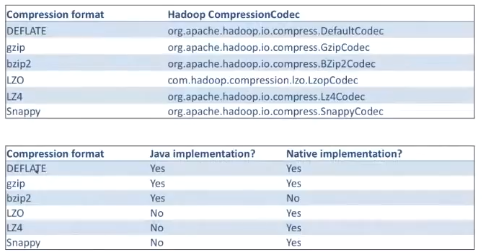

In [1]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

In [8]:
productPath = "/home/solverbot/spark-warehouse/retail_db/products/part-00000"
orderitemPath = "/home/solverbot/spark-warehouse/retail_db/order_items/part-00000"

In [3]:
spark = SparkSession.builder.appName('CompressionAlgo').getOrCreate()

22/11/22 16:25:44 WARN Utils: Your hostname, codeStation resolves to a loopback address: 127.0.1.1; using 172.17.0.1 instead (on interface docker0)
22/11/22 16:25:44 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/11/22 16:25:46 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [10]:
#loadOrders = spark.read.csv(orderitemPath)
loadOrders = sparkSQL.read.csv(orderitemPath)
loadOrders.show(2)

+---+---+----+---+------+------+
|_c0|_c1| _c2|_c3|   _c4|   _c5|
+---+---+----+---+------+------+
|  1|  1| 957|  1|299.98|299.98|
|  2|  2|1073|  1|199.99|199.99|
+---+---+----+---+------+------+
only showing top 2 rows



In [6]:
loadOrders.write.format('csv').save('temp_csv')

In [7]:
loadOrders.write.format('json').save('temp_json')

In [5]:
loadOrders.write.format('csv').option('codec','gzip').save('temp_csv_comp')

In [7]:
loadOrders.write.format('json')..option('codec','gzip').save('temp_json')

In [8]:
spark.conf.set('spark.sql.compression.codec','gzip')

In [9]:
loadOrders.write.parquet('writeParq')

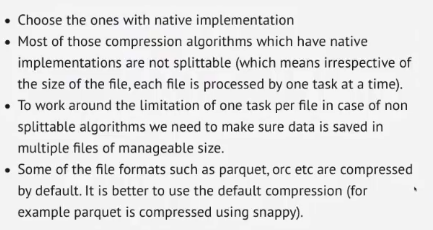

In [3]:
#What is the difference between Session and Context?
#SC is part of the Spark session that is established above
sparkSQL = SparkSession.builder.appName('Spark SQL') \
            .config('spark.jars',"/usr/share/java/postgresql-42.2.26.jar") \
            .getOrCreate()

22/11/22 16:26:13 WARN Utils: Your hostname, codeStation resolves to a loopback address: 127.0.1.1; using 172.17.0.1 instead (on interface docker0)
22/11/22 16:26:13 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
22/11/22 16:26:14 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [16]:
help(loadOrders.write.save)

Help on method save in module pyspark.sql.readwriter:

save(path: Optional[str] = None, format: Optional[str] = None, mode: Optional[str] = None, partitionBy: Union[str, List[str], NoneType] = None, **options: 'OptionalPrimitiveType') -> None method of pyspark.sql.readwriter.DataFrameWriter instance
    Saves the contents of the :class:`DataFrame` to a data source.
    
    The data source is specified by the ``format`` and a set of ``options``.
    If ``format`` is not specified, the default data source configured by
    ``spark.sql.sources.default`` will be used.
    
    .. versionadded:: 1.4.0
    
    Parameters
    ----------
    path : str, optional
        the path in a Hadoop supported file system
    format : str, optional
        the format used to save
    mode : str, optional
        specifies the behavior of the save operation when data already exists.
    
        * ``append``: Append contents of this :class:`DataFrame` to existing data.
        * ``overwrite``: Overwrit

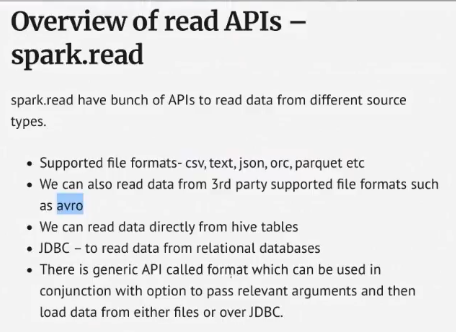

In [7]:
loadfromDB = sparkSQL.read.format('jdbc') \
        .option("url","jdbc:postgresql://localhost:5432/postgres") \
        .option("dbtable","orders") \
        .option("user","postgres") \
        .option("password",1234) \
        .option("driver","org.postgresql.Driver") \
        .load()

In [14]:
loadOrders.write.format('jdbc') \
                .option("url", "jdbc:postgresql://localhost:5432/postgres") \
                .option('dbtable','order_spark') \
                .option('user','postgres') \
                .option('password', 1234) \
                .option('driver','org.postgresql.Driver') \
                .save(mode='ignore')

In [16]:
#even ascii seperators can be used
loadfromDB.selectExpr("CONCAT(order_id,',',order_date, ',',order_customer_id,',',order_status)") \
    .write \
    .format('text') \
    .save('textSaveOrders')

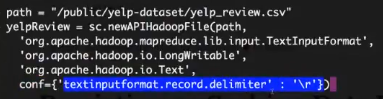

In [21]:
loadfromDB.cache

<bound method DataFrame.cache of DataFrame[order_id: int, order_date: timestamp, order_customer_id: int, order_status: string]>

In [23]:
loadfromDB.count()

68883

In [20]:
sparkSQL.sparkContext

<SparkContext master=local[*] appName=Spark SQL>

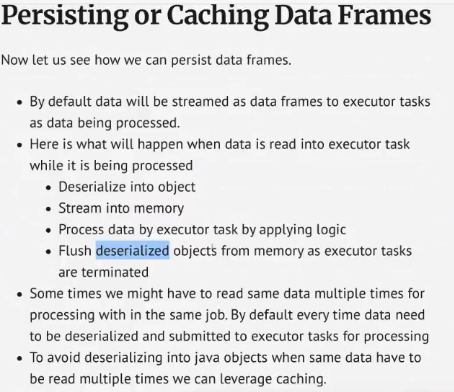

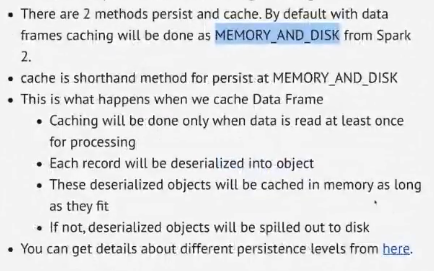

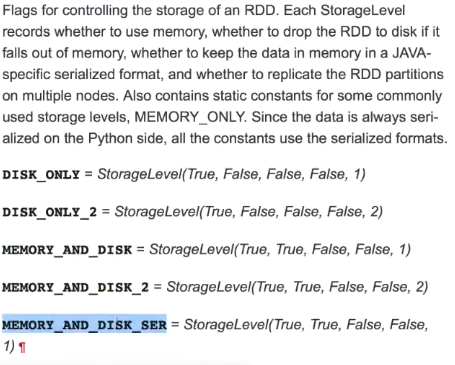

In [24]:
help(loadfromDB.persist)

Help on method persist in module pyspark.sql.dataframe:

persist(storageLevel: pyspark.storagelevel.StorageLevel = StorageLevel(True, True, False, True, 1)) -> 'DataFrame' method of pyspark.sql.dataframe.DataFrame instance
    Sets the storage level to persist the contents of the :class:`DataFrame` across
    operations after the first time it is computed. This can only be used to assign
    a new storage level if the :class:`DataFrame` does not have a storage level set yet.
    If no storage level is specified defaults to (`MEMORY_AND_DISK_DESER`)
    
    .. versionadded:: 1.3.0
    
    Notes
    -----
    The default storage level has changed to `MEMORY_AND_DISK_DESER` to match Scala in 3.0.

